In [ ]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.interpolate import make_interp_spline, BSpline
import matplotlib.pyplot as plt
import pandas as pd
import os # operating system
import seaborn as sns

In [ ]:
cwd = os.getcwd()  # Get the current working directory (cwd)
#o codigo ira rodar no caminho  'C:\\Users\\Eduarda\\OneDrive\\Adaggio_eduarda\\2.Codigos
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/Users/Julie/Library/CloudStorage/OneDrive-FundacaoGetulioVargas-FGV/DMM/TESE/codes/REAL-Data/baby-me-atende': ['shazam_ex.jpg', 'tiktok_ex.jpg', 'copy-baby-me-atende-royaties-bd.xlsx', 'chart-metrics.xlsx', 'spotify_ex.jpg', 'baby-me-atende-royaties-bd.xlsx', 'youtube_ex.jpg', 'spotify_examplo.jpg', 'Data-musica-teste.ipynb', 'royalties_ex.jpg', '.ipynb_checkpoints', 'copy-chart-metrics.xlsx']


In [ ]:
# atribuindo a uma variável a pasta de trabalho do excel
path_royalty = 'copy-baby-me-atende-royaties-bd.xlsx'
path_chart_metrics = 'copy-chart-metrics.xlsx'
relatorio_plays = pd.ExcelFile(path_chart_metrics)
relatorio_royalty = pd.ExcelFile(path_royalty)

In [ ]:
#ver abas existentes na pasta do excel
relatorio_royalty.sheet_names

['baby-me-atende-mech', 'baby-me-atende-synch', 'mech', 'time-serie-mech']

In [ ]:
df_royalties = relatorio_royalty.parse('time-serie-mech') #aba com os nomes de obras
df_royalties.head(3)

,DATA,BABY ME ATENDE,BLOQUEADO,VOCE BEBERIA OU NAO BEBERIA?,MEU SONHO,CONDOMINIO FECHADO,SUPERACAO DIGITAL,VIDA NOTURNA,FRIEZA,MENTIROSO EU,3 OPCOES,BEIJO DAS GALAXIAS,ESTADO DECADENTE,GEMIDO MUDO,EU TO AI
0,2021-07,NaN,NaN,NaN,NaN,3.179414,NaN,NaN,0.001512,0.443265,NaN,2.945314,24.632039,NaN,NaN
1,2021-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.387030,NaN,NaN,2.280521,NaN,NaN
2,2022-01,552.156292,NaN,94.23637,19.630435,13.234846,NaN,18.357771,0.711090,8.280433,6.006071,49.071141,85.634806,0.288354,5.449171


In [ ]:
#ver abas existentes na pasta do excel
relatorio_plays.sheet_names

['spotify', 'shazam', 'tiktok', 'youtube']

In [ ]:
df_spotify = relatorio_plays.parse('spotify') #aba com os nomes de obras
df_spotify.head(3)

,DateTime,Spotify Streams,Change
0,2023-03-07,234878498,93482
1,2023-03-06,234785016,106794
2,2023-03-05,234678222,86932


In [ ]:
df_shazam = relatorio_plays.parse('shazam') #aba com os nomes de obras
df_shazam.head(3)

,DateTime,Total Counts,Change
0,2023-03-07,267042,38
1,2023-03-06,267004,56
2,2023-03-05,266948,117


In [ ]:
df_tiktok = relatorio_plays.parse('tiktok') #aba com os nomes de obras
df_tiktok.head(3)

,DateTime,Total Posts,Change
0,2023-03-02,81400,-15
1,2023-03-01,81415,-16
2,2023-02-28,81431,-15


In [ ]:
df_youtube = relatorio_plays.parse('youtube') #aba com os nomes de obras
df_youtube.head(3)

,DateTime,Total Views,Change
0,2023-03-07,435944483,88721
1,2023-03-06,435855762,177798
2,2023-03-05,435677964,157832


In [ ]:
df_spotify['DateTime'] = pd.to_datetime(df_spotify['DateTime'], format='%Y-%m')
df_spotify_timeseries = df_spotify.drop(columns=['Spotify Streams'])
df_spotify_timeseries.head(5)

,DateTime,Change
0,2023-03-07,93482
1,2023-03-06,106794
2,2023-03-05,86932
3,2023-03-04,74455
4,2023-03-03,69043


In [ ]:
df_shazam['DateTime'] = pd.to_datetime(df_shazam['DateTime'], format='%Y-%m')
df_shazam_timeseries = df_shazam.drop(columns=['Total Counts'])
df_shazam_timeseries.head(5)

,DateTime,Change
0,2023-03-07,38
1,2023-03-06,56
2,2023-03-05,117
3,2023-03-04,74
4,2023-03-03,41


In [ ]:
df_tiktok['DateTime'] = pd.to_datetime(df_tiktok['DateTime'], format='%Y-%m')
df_tiktok_timeseries = df_tiktok.drop(columns=['Total Posts'])
df_tiktok_timeseries.head(5)

,DateTime,Change
0,2023-03-02,-15
1,2023-03-01,-16
2,2023-02-28,-15
3,2023-02-27,-16
4,2023-02-26,-15


In [ ]:
df_youtube['DateTime'] = pd.to_datetime(df_youtube['DateTime'], format='%Y-%m')
df_youtube_timeseries = df_youtube.drop(columns=['Total Views'])
df_youtube_timeseries.head(5)

,DateTime,Change
0,2023-03-07,88721
1,2023-03-06,177798
2,2023-03-05,157832
3,2023-03-04,99114
4,2023-03-03,94944


In [ ]:
df_royalties['DATA'] = pd.to_datetime(df_royalties['DATA'], format='%Y-%m')
df_royalties_timeseries = df_royalties[['DATA', 'BABY ME ATENDE']]
df_royalties_timeseries.head(5)

,DATA,BABY ME ATENDE
0,2021-07-01,NaN
1,2021-10-01,NaN
2,2022-01-01,552.156292
3,2022-04-01,33777.790942
4,2022-07-01,14932.609789


In [ ]:
df_spotify_timeseries.index = df_spotify['DateTime']
del df_spotify_timeseries['DateTime']
print(df_spotify_timeseries.head())

            Change
DateTime          
2023-03-07   93482
2023-03-06  106794
2023-03-05   86932
2023-03-04   74455
2023-03-03   69043


In [ ]:
df_shazam_timeseries.index = df_shazam['DateTime']
del df_shazam_timeseries['DateTime']
print(df_shazam_timeseries.head())

            Change
DateTime          
2023-03-07      38
2023-03-06      56
2023-03-05     117
2023-03-04      74
2023-03-03      41


In [ ]:
df_tiktok_timeseries.index = df_tiktok['DateTime']
del df_tiktok_timeseries['DateTime']
print(df_tiktok_timeseries.head())

            Change
DateTime          
2023-03-02     -15
2023-03-01     -16
2023-02-28     -15
2023-02-27     -16
2023-02-26     -15


In [ ]:
df_youtube_timeseries.index = df_youtube['DateTime']
del df_youtube_timeseries['DateTime']
print(df_youtube_timeseries.head())

            Change
DateTime          
2023-03-07   88721
2023-03-06  177798
2023-03-05  157832
2023-03-04   99114
2023-03-03   94944


In [ ]:
df_royalties_timeseries.index = df_royalties_timeseries['DATA']
del df_royalties_timeseries['DATA']
print(df_royalties_timeseries.head())

            BABY ME ATENDE
DATA                      
2021-07-01             NaN
2021-10-01             NaN
2022-01-01      552.156292
2022-04-01    33777.790942
2022-07-01    14932.609789


## Statistics

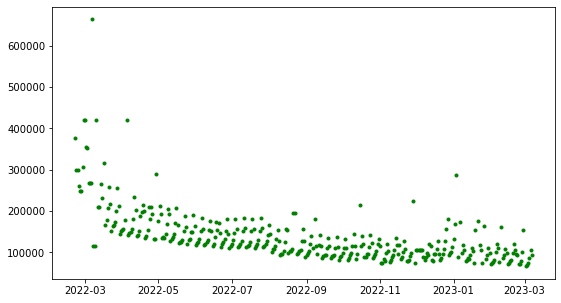

In [ ]:
#plt.plot(df_spotify_timeseries)
df_spotify_timeseries = df_spotify_timeseries[df_spotify_timeseries['Change'] != 0]
fig1 = plt.figure(figsize=(9, 5))
plt.plot(df_spotify_timeseries, '.', color='green', label='Real Data')
fig1.savefig('spotify_ex.jpg')


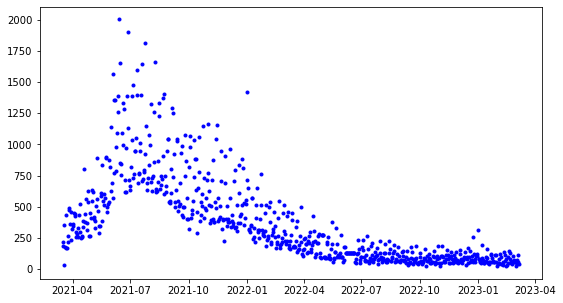

In [ ]:
#plt.plot(df_shazam_timeseries)
df_shazam_timeseries = df_shazam_timeseries[df_shazam_timeseries['Change'] != 0]
fig1 = plt.figure(figsize=(9, 5))
plt.plot(df_shazam_timeseries, '.', color='blue', label='Real Data')
fig1.savefig('shazam_ex.jpg')


TimeoutError: [Errno 60] Operation timed out: 'tiktok_ex.jpg'

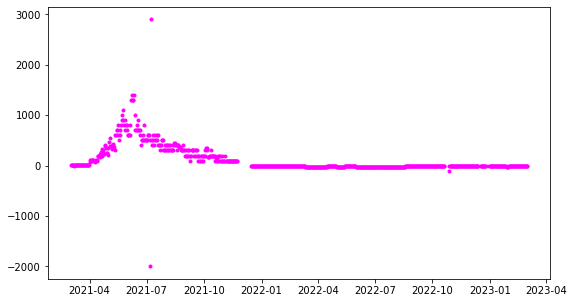

In [ ]:
#plt.plot(df_tiktok_timeseries)
df_tiktok_timeseries = df_tiktok_timeseries[df_tiktok_timeseries['Change'] != 0]
fig1 = plt.figure(figsize=(9, 5))
plt.plot(df_tiktok_timeseries, '.', color='magenta', label='Real Data')
fig1.savefig('tiktok_ex.jpg')


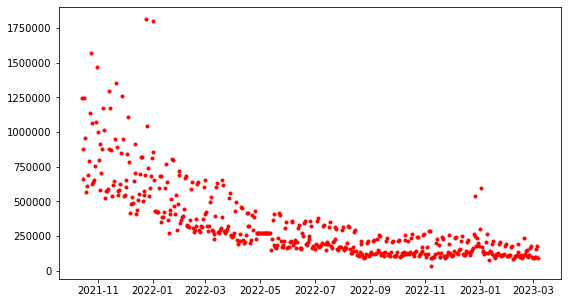

In [ ]:
#plt.plot(df_youtube_timeseries)
df_youtube_timeseries = df_youtube_timeseries[df_youtube_timeseries['Change'] != 0]
fig1 = plt.figure(figsize=(9, 5))
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.draw()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.plot(df_youtube_timeseries, '.', color='red', label='Real Data')
fig1.savefig('youtube_ex.jpg')


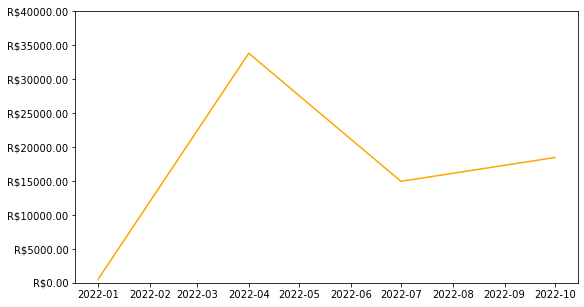

In [ ]:
from matplotlib.ticker import FuncFormatter
fig1 = plt.figure(figsize=(9, 5))
def moeda(x, pos):
    return 'R$%1.2f' % (x*1e-0)

formatter = FuncFormatter(moeda)
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)
plt.plot(df_royalties_timeseries, '-', color='orange', label='Real Data')
plt.ylim(0,40000)
fig1.savefig('royalties_ex.jpg')


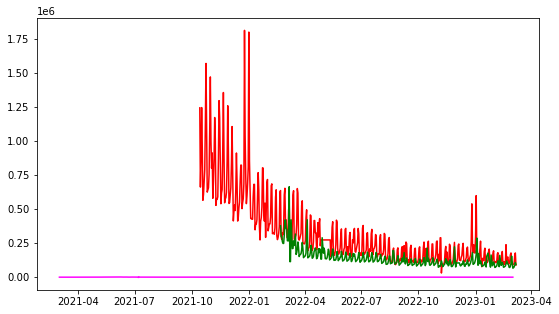

In [ ]:
#plt.plot(df_youtube_timeseries)
df_youtube_timeseries = df_youtube_timeseries[df_youtube_timeseries['Change'] != 0]
fig1 = plt.figure(figsize=(9, 5))
plt.plot(df_youtube_timeseries, '-', color='red', label='Real Data')
plt.plot(df_tiktok_timeseries, '-', color='magenta', label='Real Data')
plt.plot(df_spotify_timeseries, '-', color='green', label='Real Data')

In [ ]:
#stationarity
rolling_mean = df_spotify_timeseries.rolling(7).mean()
rolling_std = df_spotify_timeseries.rolling(7).std()

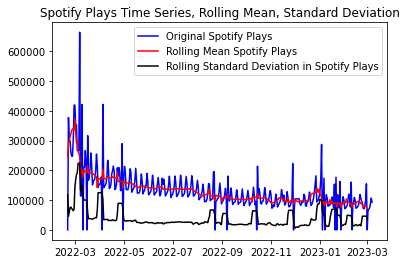

In [ ]:
plt.plot(df_spotify_timeseries, color="blue",label="Original Spotify Plays")
plt.plot(rolling_mean, color="red", label="Rolling Mean Spotify Plays")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Spotify Plays")
plt.title("Spotify Plays Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")

In [ ]:
# augmented Dickey-Fuller test from the statsmodels package
from statsmodels.tsa.stattools import adfuller
adft = adfuller(df_spotify_timeseries,autolag="AIC") #autolag parameter as “AIC,” which means that the lag is chosen to minimize the information criterion:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used",
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

       Values                       Metric
0    1.119587              Test Statistics
1    0.995380                      p-value
2   16.000000             No. of lags used
3  364.000000  Number of observations used
4   -3.448443          critical value (1%)
5   -2.869513          critical value (5%)
6   -2.571018         critical value (10%)


In [ ]:
adft = adfuller(df_royalties_timeseries,autolag="AIC") #autolag parameter as “AIC,” which means that the lag is chosen to minimize the information criterion:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used",
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

MissingDataError: exog contains inf or nans

In [ ]:
df_spotify_timeseries

In [ ]:
autocorrelation_lag1 = df_spotify_timeseries['Change'].autocorr(lag=12)
print("Month Lag: ", autocorrelation_lag1, "Not highly autocorrelated among months")

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decompose = seasonal_decompose(df_spotify_timeseries['Change'],model='additive', period=12)
decompose.plot()
plt.show()

NameError: name 'seasonal_decompose' is not defined